In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from math import ceil, floor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from collections import defaultdict
from tqdm.auto import tqdm

import random
from sklearn.ensemble import RandomForestClassifier

import pandas_profiling
import warnings

from collections import Counter


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from load_tokamaks import load_tokamaks
from expand_columns import expand_columns
from remove_columns import remove_columns
from impute_values import impute_values, _impute_complex_value
# from one_hot import one_hot

In [568]:
cur_lists = [
    ['JET', 3144, 3144, '1986 - 2002', "JET", "51.652", "-1.266"],
    ['ASDEX', 625, 1250, '1982 - 1990', "Max Planck", "48.141111", "11.582222"],
    ['AUG', 638, 1250, '1994 - 2002', "Max Planck", "48.141111", "11.582222"],
    ['CMOD', 87, 750, '1996 - 1998', "MIT", "42.36", "-71.092"],
    ['D3D', 510, 1250, '1987 - 1999', "San Diego", "32.893461", "-117.234556"],
    ['JFT2M', 530, 1000, '1986 - 1994', "Naka", "36.442694", "140.595861"],
    ['JT60U', 89, 250, '1994 - 2001',  "Naka", "36.442694", "140.595861"],
    ['TCV', 21, 100, '1995 - 1997', "Switzerland", "46.520278", "6.565556"],
    ['TDEV', 10, 75, '1998 - 1998', "Montreal", "45.508889", "-73.561667"],
    ['NSTX', 7, 50, '2002 - 2002', "PPPL", "40.348825", "-74.602183"],
    ['PBXM', 264, 500, '1989 - 1989', "PPPL", "40.348825", "-74.602183"],
    ['PDX', 143, 500, '1983 - 1983', "PPPL", "40.348825", "-74.602183"],
    ['TFTR', 104, 500, '1989 - 1994',  "PPPL", "40.348825", "-74.602183"]
]

In [600]:
gg = defaultdict(int)
bb = defaultdict(int)
dd = defaultdict(int)
la = defaultdict(int)
lo = defaultdict(int)
tt = defaultdict(int)
ta = defaultdict(int)

for cur_item in list(map(lambda xx: [xx[0], xx[2], xx[-3], xx[-2], xx[-1]], cur_lists)):
    item_dict = dict(tokamak_data[tokamak_data["tok"] == cur_item[0]].is_good.value_counts())

    dd[cur_item[-3]] += np.sum(list(item_dict.values()))
    if True in item_dict : gg[cur_item[-3]] += item_dict[True]
    if False in item_dict : bb[cur_item[-3]] += item_dict[False]
        
    la[cur_item[-3]] = cur_item[-2]
    lo[cur_item[-3]] = cur_item[-1]
    
    if cur_item[0] == "JET" : tt[cur_item[-3]] += 1
    ta[cur_item[-3]] += cur_item[1]
        
work_table = pd.DataFrame([gg,bb,dd, la, lo, tt, ta])
work_table.columns = map(lambda x: f'"{x}"', work_table.columns)

work_table = pd.DataFrame.transpose(work_table)
work_table.columns = ["good", "bad", "all", "lat", "lon", "jet", "tar"]

work_table.fillna(0, inplace=True)

pd.DataFrame.transpose(work_table.drop(columns=["good",'bad'])).to_dict()
# print(str(work_table.drop(columns=["good",'bad'])))
# # print(dict(gg))
# # print(dict(bb))
# # print(dict(dd))
# # for kk, vv in dd.items():
# #     print(f"'{kk}'", "", vv)

{'"JET"': {'all': 3144,
  'lat': '51.652',
  'lon': '-1.266',
  'jet': 1,
  'tar': 3144},
 '"Max Planck"': {'all': 1263,
  'lat': '48.141111',
  'lon': '11.582222',
  'jet': 0,
  'tar': 2500},
 '"MIT"': {'all': 86, 'lat': '42.36', 'lon': '-71.092', 'jet': 0, 'tar': 750},
 '"San Diego"': {'all': 493,
  'lat': '32.893461',
  'lon': '-117.234556',
  'jet': 0,
  'tar': 1250},
 '"Naka"': {'all': 619,
  'lat': '36.442694',
  'lon': '140.595861',
  'jet': 0,
  'tar': 1250},
 '"Switzerland"': {'all': 21,
  'lat': '46.520278',
  'lon': '6.565556',
  'jet': 0,
  'tar': 100},
 '"Montreal"': {'all': 10,
  'lat': '45.508889',
  'lon': '-73.561667',
  'jet': 0,
  'tar': 75},
 '"PPPL"': {'all': 518,
  'lat': '40.348825',
  'lon': '-74.602183',
  'jet': 0,
  'tar': 1550}}

In [588]:
gbd = {}

jet_data = dict(tokamak_data[tokamak_data.tok == "JET"].is_good.value_counts())
else_data = dict(tokamak_data[tokamak_data.tok != "JET"].is_good.value_counts())

pd.DataFrame([
    [jet_data[True],jet_data[False]],
    [else_data[True],else_data[False]]
], columns=["Good", "Bad"], index=["JET", "Else"])

,Good,Bad
JET,1434,1710
Else,2097,913


In [4]:
tokamak_data = load_tokamaks()


13 Tokamaks
['AUG', 638, '1994 - 2002']
['TDEV', 10, '1998 - 1998']
['PDX', 143, '1983 - 1983']
['D3D', 510, '1987 - 1999']
['JFT2M', 530, '1986 - 1994']
['TCV', 21, '1995 - 1997']
['TFTR', 104, '1989 - 1994']
['CMOD', 87, '1996 - 1998']
['NSTX', 7, '2002 - 2002']
['PBXM', 264, '1989 - 1989']
['ASDEX', 625, '1982 - 1990']
['JET', 3144, '1986 - 2002']
['JT60U', 89, '1994 - 2001']

       good   bad
jet    1434  1710
else   2106   922
total  3540  2632


In [390]:
tokamak_data.columns

Index(['_abs_bt_2', '_abs_bt_2_abs_ip', '_abs_bt_2_epsilon',
       '_abs_bt_2_inv_abs_ip', '_abs_bt_2_inv_epsilon', '_abs_bt_2_inv_nel',
       '_abs_bt_2_inv_rgeo', '_abs_bt_2_inv_vol', '_abs_bt_2_nel',
       '_abs_bt_2_rgeo',
       ...
       '_inv_abs_bt_inv_pressure_nel', '_inv_abs_ip_inv_pressure_tev',
       '_inv_rgeo_inv_tev_2', '_inv_abs_bt_pressure_2', '_inv_abs_bt_tev_vol',
       '_pressure_2_rgeo', 'zero_log_inv_tauc92', 'zero_log_inv_tauc93',
       'zero_pecrhc', 'zero_wfaniic'],
      dtype='object', length=1002)

In [394]:
for cur_index, this_col in enumerate(tokamak_data.columns):
    if "_vol_2" in this_col or "_vol_3" in this_col:
        print(this_col)
#     else:
#         print(this_col)


_abs_bt_inv_vol_2
_abs_bt_vol_2
_abs_ip_inv_vol_2
_abs_ip_vol_2
_epsilon_inv_vol_2
_epsilon_vol_2
_inv_abs_bt_inv_vol_2
_inv_abs_bt_vol_2
_inv_abs_ip_inv_vol_2
_inv_abs_ip_vol_2
_inv_epsilon_inv_vol_2
_inv_epsilon_vol_2
_inv_nel_inv_vol_2
_inv_nel_vol_2
_inv_rgeo_inv_vol_2
_inv_rgeo_vol_2
_inv_vol_2
_inv_vol_2_nel
_inv_vol_2_rgeo
_inv_vol_3
_nel_vol_2
_rgeo_vol_2
_vol_2
_vol_3
_pressure_vol_2
_inv_pressure_inv_vol_2
_inv_vol_2_tev
_tev_vol_2
_inv_tev_inv_vol_2
_inv_tev_vol_2
_inv_vol_2_pressure
_inv_pressure_vol_2


In [396]:
tokamak_data

,_abs_bt_2,_abs_bt_2_abs_ip,_abs_bt_2_epsilon,_abs_bt_2_inv_abs_ip,_abs_bt_2_inv_epsilon,_abs_bt_2_inv_nel,_abs_bt_2_inv_pressure,_abs_bt_2_inv_rgeo,_abs_bt_2_inv_tev,_abs_bt_2_inv_vol,...,wfaniic,wmhd,wth,wtot,zero_delta,zero_log_tauc92,zero_log_tauc93,zero_pecrhc,zero_picrhc,zero_wfaniic
4,4.862025,1.448883e+06,1.163965,0.000016,20.309270,1.328422e-19,1.384501e-22,2.863383,0.003960,0.892115,...,0.000000,127400.0,80110.0,103500.0,True,False,False,True,True,True
5,4.862025,1.438673e+06,1.177046,0.000016,20.083566,1.282856e-19,1.222681e-22,2.870145,0.003692,0.886907,...,0.000000,141100.0,95370.0,119600.0,True,False,False,True,True,True
6,4.862025,1.435270e+06,1.187501,0.000016,19.906759,1.303492e-19,1.222064e-22,2.887188,0.003593,0.889178,...,0.000000,144500.0,99230.0,124400.0,True,False,False,True,True,True
11,4.862025,1.444508e+06,1.161085,0.000016,20.359655,1.425814e-19,1.429192e-22,2.871840,0.004045,0.899542,...,0.000000,117000.0,72170.0,95840.0,True,False,False,True,True,True
12,4.862025,1.438673e+06,1.178316,0.000016,20.061926,1.286250e-19,1.159510e-22,2.871840,0.003571,0.886907,...,0.000000,141600.0,96200.0,120700.0,True,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10371,8.708401,2.720504e+07,3.286758,0.000003,23.073268,3.769871e-19,1.654143e-22,3.015374,0.003639,0.078032,...,0.985708,3550000.0,2100000.0,3629000.0,False,True,True,True,False,False
10375,8.737936,2.742838e+07,3.293739,0.000003,23.180805,2.982231e-19,1.368724e-22,3.024554,0.003901,0.078367,...,0.985708,3838000.0,2369000.0,3847000.0,False,True,True,True,False,False
10376,8.655364,2.690953e+07,3.259580,0.000003,22.983125,2.934022e-19,1.372051e-22,2.987699,0.003869,0.077418,...,0.985708,3971000.0,2416000.0,4009000.0,False,True,True,True,False,False
10377,8.625969,2.693890e+07,3.244412,0.000003,22.933998,3.091745e-19,1.328918e-22,2.976525,0.003575,0.077224,...,0.985708,4218000.0,2542000.0,4295000.0,False,True,True,True,False,False


In [405]:
tokamak_data.columns

Index(['_abs_bt_2', '_abs_bt_2_abs_ip', '_abs_bt_2_epsilon',
       '_abs_bt_2_inv_abs_ip', '_abs_bt_2_inv_epsilon', '_abs_bt_2_inv_nel',
       '_abs_bt_2_inv_pressure', '_abs_bt_2_inv_rgeo', '_abs_bt_2_inv_tev',
       '_abs_bt_2_inv_vol',
       ...
       'zero__imp_wtot_tok_d3d', 'zero__imp_wtot_tok_jet',
       'zero__imp_wtot_tok_jft2m', 'zero__imp_wtot_tok_jt60u',
       'zero__imp_wtot_tok_nstx', 'zero__imp_wtot_tok_pbxm',
       'zero__imp_wtot_tok_pdx', 'zero__imp_wtot_tok_tcv',
       'zero__imp_wtot_tok_tdev', 'zero__imp_wtot_tok_tftr'],
      dtype='object', length=1492)

In [433]:
from booleanize import booleanize

In [434]:
print(len(tokamak_data.columns))
booleanize(tokamak_data)
expand_columns(tokamak_data)
print(len(tokamak_data.columns))
remove_columns(tokamak_data)
print(len(tokamak_data.columns))
tokamak_data.sort_index(axis=1, inplace=True)
print(len(tokamak_data.columns))

1258
1258
1228
1228


In [6]:
import pprint
pp = pprint.PrettyPrinter()

In [7]:
warnings.filterwarnings('ignore')
answers = impute_values(tokamak_data)
warnings.resetwarnings()

(3, 6, 9, 10, 17, 28, 28, 77, 85, 89, 97, 109, 245, 321, 377, 393, 446, 698)
('pohm', 'nel', 'pnbi', 'pecrhc', 'pl', 'betmhd', 'wmhd', 'wtot', 'tautot', 'wth', 'tauth', 'wfani', 'q95', 'picrhc', 'prad', 'wfaniic', 'tev', 'nev')
pohm AUG.............
************************
overfit (lin / tok): ['pohm', 'AUG', 0.6400063372365173, 0.5519075682689121]
************************
.........
************************
overfit (lin / all): ['pohm', 'AUG', 0.5781193646448559, 0.48523583175333385]
************************

pohm AUG 0.5519075682689121
['auxheat_ic', 'beili2', 'divmat_c', 'elmtype_type_i', 'inv_amin', 'inv_bt', 'inv_ip', 'inv_kappaa', 'inv_time', 'ip', 'is_good', 'kappa', 'meff', 'pinj', 'rgeo', 'inv_beili2']
nel JET..........................
************************
overfit (log / all): ['nel', 'JET', 0.6976342063180999, 0.42898339914181005]
************************

nel JET 0.5656672424930094
['abs_bt', 'abs_ip', 'amin', 'auxheat_ic', 'auxheat_nb', 'beili2', 'bt', 'config_dn', 'con

wth D3D....................
************************
overfit (lin / all): ['wth', 'D3D', 0.9266739238136554, 0.8408200737825533]
************************
.....................
wth D3D 0.9863016554249712
['abs_bt', 'amin', 'auxheat_ic', 'config_sn', 'delta', 'inv_kappaa', 'is_good', 'log_inv_pgasa', 'log_ip', 'meff', 'phase_gelm', 'phase_selm', 'pinj', 'standard', 'time', 'imp_nev', 'inv_beili2', 'log_inv_beili2']
wth JET.....................
************************
overfit (lin / all): ['wth', 'JET', 0.9295155614261449, 0.8178307479935858]
************************
.......................
************************
overfit (log / all): ['wth', 'JET', 0.9944626255541327, 0.9438807510516188]
************************

wth JET 0.9438807510516188
['abs_bt', 'auxheat_ic', 'auxheat_nb', 'beili2', 'config_dn', 'delta', 'divmat_ti', 'dwhc', 'elmtype_type_i', 'elmtype_type_iii', 'inv_bt', 'inv_pgasz', 'inv_rgeo', 'inv_time', 'karea', 'limmat_c', 'log_ip', 'pgasz', 'phase_gelm', 'phase_selm', 'pinj

wfaniic AUG........
************************
overfit (lin / all): ['wfaniic', 'AUG', 0.990591086340149, 0.0]
************************

wfaniic D3D........
************************
overfit (lin / all): ['wfaniic', 'D3D', 0.9908652359459853, 0.0]
************************

wfaniic JET................
wfaniic JET 0.997787175095167
['auxheat_ic', 'auxheat_nb', 'tok_cmod', 'walmat_c']
tev CMOD.........
************************
overfit (lin / tok): ['tev', 'CMOD', 0.6333502540011411, 0.39429927011780164]
************************
........
************************
overfit (lin / all): ['tev', 'CMOD', 0.7823541870579556, 0.32919314763658314]
************************
.........
************************
overfit (log / tok): ['tev', 'CMOD', 0.527313202222782, 0.40419502991391687]
************************
...........
************************
overfit (log / all): ['tev', 'CMOD', 0.7720678548479623, 0.05937063203247961]
************************

tev CMOD 0.40419502991391687
['inv_ip', 'inv_time', 'rgeo

In [8]:
1+1

2

In [9]:
abridged_dict = {}
cur_threshold = 0.85

for cur_key, cur_value in answers.items():
    cur_col, cur_tok, use_log, use_all = cur_key
    cur_score, cur_columns = cur_value
    if cur_score < cur_threshold : continue
        
    if cur_col not in abridged_dict: abridged_dict[cur_col] = {}

    if cur_tok not in abridged_dict[cur_col]:
        abridged_dict[cur_col][cur_tok] = (cur_score, use_log, use_all, cur_columns)
        continue
        
    if cur_score < abridged_dict[cur_col][cur_tok][0] : continue
    abridged_dict[cur_col][cur_tok] = (cur_score, use_log, use_all, cur_columns)

for cur_col, cur_value in abridged_dict.items():
    for cur_tok, cur_sub_value in cur_value.items():
        best_key = cur_sub_value[1:3]
        best_columns = cur_sub_value[-1]
        
        print(cur_col, cur_tok)
        try:
            work_result = _impute_complex_value(
                tokamak_data, best_columns, cur_col,
                cur_tok, *best_key, True, cur_threshold
            )
        except:
            continue
            
        if work_result == False : continue
        assert np.abs( work_result[0] - cur_sub_value[0] ) < 0.05

pnbi JET
.......pl D3D
........betmhd JET
......wmhd JET
.......wtot AUG
......wtot JET
......wth AUG
......wth D3D
......wth JET
.

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


.......
************************
overfit (log / all): ['wth', 'JET', 0.9943750254720691, 0.9415537491163922]
************************
tauth D3D
......wfani JET
........q95 JET
......wfaniic JET
......

In [10]:
warnings.filterwarnings('ignore')
answers = impute_values(tokamak_data)
warnings.resetwarnings()

(3, 6, 10, 12, 54, 85, 97, 105, 321, 377, 446, 698)
('pohm', 'nel', 'pecrhc', 'pl', 'wfaniic', 'tautot', 'tauth', 'wfani', 'picrhc', 'prad', 'tev', 'nev')
pohm AUG...............
************************
overfit (lin / tok): ['pohm', 'AUG', 0.7010532684043504, 0.6308617153235605]
************************
.............
pohm AUG 0.6308617153235605
['abs_bt', 'amin', 'auxheat_ic', 'beili2', 'betmhd', 'delta', 'elmtype_type_i', 'inv_amin', 'inv_ip', 'inv_rgeo', 'inv_time', 'is_good', 'kappa', 'log_bt', 'log_ip', 'meff', 'pinj', 'pnbi', 'q95', 'time', 'wth', 'wtot', 'inv_beili2', 'imp_wth', 'inv_q95']
nel JET...........................
************************
overfit (log / all): ['nel', 'JET', 0.8032700614286553, 0.7186205132931178]
************************

nel JET 0.8331819662110889
['auxheat_ic', 'auxheat_nb', 'beili2', 'betmhd', 'bt', 'config_dn', 'config_sn', 'delta', 'elmtype_type_iii', 'inv_karea', 'inv_pgasz', 'inv_time', 'inv_vol', 'is_good', 'kappa', 'limmat_be', 'log_inv_pgasa'

picrhc JET........................
picrhc JET 0.8104068052785587
['abs_ip', 'auxheat_ic', 'auxheat_nb', 'beili2', 'delta', 'divmat_be', 'elmtype_type_i', 'elmtype_type_iii', 'inv_kappa', 'inv_pgasz', 'inv_tauc92', 'is_good', 'limmat_be', 'log_bt', 'log_inv_karea', 'log_inv_meff', 'log_inv_time', 'log_karea', 'log_meff', 'log_time', 'pgasz', 'phase_selm', 'pinj', 'pnbi', 'pos_ip', 'q95', 'rgeo', 'walmat_c', 'wth', 'imp_wfani', 'imp_wtot', 'imp_q95', 'inv_wmhd']
prad AUG...................
************************
overfit (lin / all): ['prad', 'AUG', 0.5672354585812207, 0.4830454804712445]
************************

prad AUG 0.84953123318441
['abs_bt', 'amin', 'auxheat_ic', 'betmhd', 'delta', 'divmat_c', 'elmtype_type_i', 'inv_amin', 'inv_bt', 'inv_ip', 'inv_kappaa', 'inv_time', 'ip', 'is_good', 'kappa', 'kappaa', 'karea', 'log_inv_pgasa', 'meff', 'pgasa', 'pinj', 'pnbi', 'rgeo', 'time', 'wth', 'wtot', 'log_inv_beili2', 'imp_wtot', 'inv_q95', 'inv_wmhd', 'log_inv_wth']
prad D3D...........

In [22]:
abridged_dict = {}
cur_threshold = 0.8

for cur_key, cur_value in answers.items():
    cur_col, cur_tok, use_log, use_all = cur_key
    cur_score, cur_columns = cur_value
    if cur_score < cur_threshold : continue
        
    if cur_col not in abridged_dict: abridged_dict[cur_col] = {}

    if cur_tok not in abridged_dict[cur_col]:
        abridged_dict[cur_col][cur_tok] = (cur_score, use_log, use_all, cur_columns)
        continue
        
    if cur_score < abridged_dict[cur_col][cur_tok][0] : continue
    abridged_dict[cur_col][cur_tok] = (cur_score, use_log, use_all, cur_columns)

for cur_col, cur_value in abridged_dict.items():
    for cur_tok, cur_sub_value in cur_value.items():
        best_key = cur_sub_value[1:3]
        best_columns = cur_sub_value[-1]
        
        print(cur_col, cur_tok)
        try:
            work_result = _impute_complex_value(
                tokamak_data, best_columns, cur_col,
                cur_tok, *best_key, True, cur_threshold
            )
        except:
            print("✘", end="")
            continue
            
        print("✓", end="")
        

pohm AUG
✘tauth D3D
✘prad JFT2M
✘nev AUG
✘nev JET
✘tev CMOD
......✓tev ASDEX
.

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


.....✓tev JET
✘

In [24]:
expand_columns(tokamak_data)
remove_columns(tokamak_data)
tokamak_data.sort_index(axis=1, inplace=True)

print(len(tokamak_data.columns))

170


In [25]:
warnings.filterwarnings('ignore')
answers = impute_values(tokamak_data)
warnings.resetwarnings()

(10, 54, 105, 317, 358)
('pecrhc', 'wfaniic', 'wfani', 'prad', 'tev')
pecrhc D3D........
************************
overfit (lin / all): ['pecrhc', 'D3D', 0.9486557135642139, 0.0]
************************

wfaniic AUG........
************************
overfit (lin / all): ['wfaniic', 'AUG', 0.9960692558781721, 0.0]
************************

wfaniic D3D........
************************
overfit (lin / all): ['wfaniic', 'D3D', 0.9960496990120327, 0.0]
************************

wfani AUG...............
************************
overfit (lin / tok): ['wfani', 'AUG', 0.8572361480449259, 0.7579495265156866]
************************
........
************************
overfit (lin / all): ['wfani', 'AUG', 0.9660971440606911, 0.7665023995527399]
************************

wfani AUG 0.7665023995527399
['abs_bt', 'auxheat_nb', 'beili2', 'betmhd', 'bt', 'divmat_ti', 'elmtype_type_iii', 'imp_nel', 'imp_pnbi', 'imp_tauth', 'imp_wmhd', 'inv_amin', 'inv_tautot', 'is_good', 'log_inv_nel', 'log_inv_nev', 'log_

In [18]:
warnings.filterwarnings('ignore')
answers = impute_values(tokamak_data)
warnings.resetwarnings()

(3, 5, 10, 54, 105, 364, 365, 446)
('pohm', 'tauth', 'pecrhc', 'wfaniic', 'wfani', 'prad', 'nev', 'tev')
pohm AUG........................
************************
overfit (lin / all): ['pohm', 'AUG', 0.7504361072043076, 0.6946251833579544]
************************

pohm AUG 0.8323269997939705
['abs_ip', 'beili2', 'bt', 'delta', 'inv_amin', 'inv_karea', 'is_good', 'kappa', 'nel', 'pgasa', 'phase_gelm', 'picrhc', 'pinj', 'pl', 'pnbi', 'q95', 'rgeo', 'tautot', 'time', 'wtot', 'imp_prad', 'inv_beili2', 'imp_wth', 'inv_betmhd', 'inv_q95', 'imp_tauth', 'inv_nel', 'inv_tautot']
tauth D3D...........................................
tauth D3D 0.9998247069713567
['abs_bt', 'auxheat_ic', 'inv_kappaa', 'is_good', 'meff', 'phase_selm', 'pl', 'pnbi', 'wth', 'imp_nev', 'inv_beili2', 'log_inv_wth', 'inv_nel', 'inv_pl', 'log_inv_pl', 'inv_tautot', 'log_inv_tautot']
pecrhc D3D........
************************
overfit (lin / all): ['pecrhc', 'D3D', 0.9486557135642139, 0.0]
************************

wfanii

In [191]:
abridged_dict = {}
cur_threshold = 0.7

for cur_key, cur_value in answers.items():
    cur_col, cur_tok, use_log, use_all = cur_key
    cur_score, cur_columns = cur_value
    if cur_score < cur_threshold : continue
        
    if cur_col not in abridged_dict: abridged_dict[cur_col] = {}

    if cur_tok not in abridged_dict[cur_col]:
        abridged_dict[cur_col][cur_tok] = (cur_score, use_log, use_all, cur_columns)
        continue
        
    if cur_score < abridged_dict[cur_col][cur_tok][0] : continue
    abridged_dict[cur_col][cur_tok] = (cur_score, use_log, use_all, cur_columns)

for cur_col, cur_value in abridged_dict.items():
    for cur_tok, cur_sub_value in cur_value.items():
        best_key = cur_sub_value[1:3]
        best_columns = cur_sub_value[-1]
        
        print(cur_col, cur_tok)
        try:
            work_result = _impute_complex_value(
                tokamak_data, best_columns, cur_col,
                cur_tok, *best_key, True, cur_threshold
            )
        except:
            print("✘", end="")
            continue
            
        print("✓", end="")
        

wfani AUG
✘prad D3D
.......✓prad PBXM
✘prad JET
.......✓tev CMOD
✘tev ASDEX
......✓

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [268]:
warnings.filterwarnings('ignore')
answers = impute_values(tokamak_data)
warnings.resetwarnings()

.................................................................................................................................................
************************
overfit (log / tok): ['tev', 'ASDEX', 0.4785429100921379, 0.10516650555611762]
************************
..

KeyboardInterrupt: 

In [193]:
tokamak_data[tokamak_data.prad.isnull() & (tokamak_data.tok == "JET")].prad

Series([], Name: prad, dtype: float64)

In [312]:
np.sum(tokamak_data.tev.isnull())

0

In [313]:
tokamak_data["epsilon"] = tokamak_data.amin / tokamak_data.rgeo
tokamak_data["greenwald"] = tokamak_data.nel * ( tokamak_data.amin ** 2 ) / tokamak_data.abs_ip
tokamak_data["pressure"] = tokamak_data.nev * tokamak_data.tev

expand_columns(tokamak_data)
remove_columns(tokamak_data)
tokamak_data.sort_index(axis=1, inplace=True)


In [456]:
poly_cols = [
    "nel", "abs_ip", "rgeo", "abs_bt", 
    "tev", "epsilon", "pressure", "vol"
]

for cur_col in poly_cols.copy():
    work_data = None
    try:
        work_data = tokamak_data[cur_col]
    except:
        poly_cols.remove(cur_col)
        continue
        
    if np.sum(work_data.isnull()) > 0 :
        poly_cols.remove(cur_col)
        continue
        
    assert all(work_data > 0)

poly_cols.sort()

poly_cols

['abs_bt', 'abs_ip', 'epsilon', 'nel', 'pressure', 'rgeo', 'tev', 'vol']

In [198]:
def expand_poly(n):
    cur_output = _expand_poly([], 0, n)
    cur_set = set(list(map(tuple,cur_output)))

    for sub_set in cur_set.copy():
        for cur_index, work_value in enumerate(sub_set):
            did_remove = False

            for that_value in sub_set[cur_index+1:]:
                this_value = work_value

                if this_value.startswith("inv_"):
                    this_value = this_value.replace("inv_", "")
                elif that_value.startswith("inv_"):
                    that_value = that_value.replace("inv_", "")
                else:
                    continue

                if this_value != that_value: continue

                did_remove = True
                cur_set.remove(sub_set)
                break

            if did_remove : break

    return cur_set
    
def _expand_poly(in_vec, i, stop):
    out_vec = []
    if i >= stop: return [sorted(in_vec)]
    
    for cur_col in poly_cols:
        tmp_vec = in_vec.copy()
        tmp_vec.append(cur_col)
        out_vec.extend(_expand_poly(tmp_vec, i+1, stop))

    for tmp_col in poly_cols:
        cur_col = f"inv_{tmp_col}"
        tmp_vec = in_vec.copy()
        tmp_vec.append(cur_col)
        out_vec.extend(_expand_poly(tmp_vec, i+1, stop))
        
    return sorted(out_vec)
  

In [457]:
for sub_set in expand_poly(2).union(expand_poly(3)):
    work_col = tokamak_data[sub_set[0]].copy()
    for work_index in sub_set[1:]:
        work_col *= tokamak_data[work_index]
    
    cur_counter = Counter(sub_set)
    
    cur_name = ""
    for cur_key in sorted(list(cur_counter.keys())):
        cur_name += f"_{cur_key}"
        cur_value = cur_counter[cur_key]
        
        if cur_value == 1 : continue
        cur_name += f"_{cur_value}"
        
    tokamak_data[cur_name] = np.log10(work_col)
#     
    
#     print("_".join(sub_set))

In [316]:
print(len(tokamak_data.columns))

expand_columns(tokamak_data)
remove_columns(tokamak_data)
# tokamak_data.sort_index(axis=1, inplace=True)

print(len(tokamak_data.columns))

1003
999


In [474]:
tokamak_data.tok.value_counts()

JET      3144
AUG       638
ASDEX     625
JFT2M     530
D3D       493
PBXM      264
PDX       143
TFTR      104
JT60U      89
CMOD       86
TCV        21
TDEV       10
NSTX        7
Name: tok, dtype: int64

In [472]:
len(tokamak_data.columns)

996

In [469]:
np.array(cur_sides) - 3.5

array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5])

In [465]:
cur_sides = [ 1 , 2 , 3 , 4 , 5 , 6 ]

for cur_side in cur_sides:
    tmp_sides = [ tmp_side for tmp_side in cur_sides.copy() ]
    higher = np.sum([ tmp_side > cur_side for tmp_side in tmp_sides ])
    lower = np.sum([ tmp_side < cur_side for tmp_side in tmp_sides ])
    print(cur_side, np.mean(tmp_sides), tmp_sides, higher, lower)

1 3.5 [1, 2, 3, 4, 5, 6] 5 0
2 3.5 [1, 2, 3, 4, 5, 6] 4 1
3 3.5 [1, 2, 3, 4, 5, 6] 3 2
4 3.5 [1, 2, 3, 4, 5, 6] 2 3
5 3.5 [1, 2, 3, 4, 5, 6] 1 4
6 3.5 [1, 2, 3, 4, 5, 6] 0 5


In [459]:
print(len(tokamak_data.columns))

expand_columns(tokamak_data)
print(len(tokamak_data.columns))
remove_columns(tokamak_data)
print(len(tokamak_data.columns))
tokamak_data.sort_index(axis=1, inplace=True)

print(len(tokamak_data.columns))

1032
1242
996
996


In [452]:
for col in tokamak_data.columns:
    if len(tokamak_data[col].value_counts()) > 1 : continue
    print(col)

_imp_beili2_tok_asdex
_imp_beili2_tok_aug
_imp_beili2_tok_cmod
_imp_beili2_tok_d3d
_imp_beili2_tok_jet
_imp_beili2_tok_jft2m
_imp_beili2_tok_nstx
_imp_beili2_tok_pbxm
_imp_beili2_tok_pdx
_imp_beili2_tok_tcv
_imp_beili2_tok_tdev
_imp_beili2_tok_tftr
_imp_betmhd_tok_asdex
_imp_betmhd_tok_aug
_imp_betmhd_tok_cmod
_imp_betmhd_tok_d3d
_imp_betmhd_tok_jft2m
_imp_betmhd_tok_nstx
_imp_betmhd_tok_pbxm
_imp_betmhd_tok_pdx
_imp_betmhd_tok_tcv
_imp_betmhd_tok_tdev
_imp_betmhd_tok_tftr
_imp_nel_tok_asdex
_imp_nel_tok_aug
_imp_nel_tok_cmod
_imp_nel_tok_d3d
_imp_nel_tok_jft2m
_imp_nel_tok_jt60u
_imp_nel_tok_nstx
_imp_nel_tok_pbxm
_imp_nel_tok_pdx
_imp_nel_tok_tcv
_imp_nel_tok_tdev
_imp_nel_tok_tftr
_imp_nev_tok_cmod
_imp_nev_tok_jt60u
_imp_nev_tok_nstx
_imp_nev_tok_tdev
_imp_nev_tok_tftr
_imp_picrhc_tok_asdex
_imp_picrhc_tok_aug
_imp_picrhc_tok_cmod
_imp_picrhc_tok_d3d
_imp_picrhc_tok_jft2m
_imp_picrhc_tok_jt60u
_imp_picrhc_tok_nstx
_imp_picrhc_tok_pbxm
_imp_picrhc_tok_pdx
_imp_picrhc_tok_tcv
_imp_pi

In [458]:
bool_cols = []
numeric_cols = []
other_cols = []

for cur_col in tokamak_data.columns:
    if tokamak_data[cur_col].dtype == bool:
        bool_cols.append(cur_col)
    elif tokamak_data[cur_col].dtype == int:
        numeric_cols.append(cur_col)
    elif tokamak_data[cur_col].dtype == float:
        numeric_cols.append(cur_col)
    else:
        other_cols.append(cur_col)
 
def bool_plot(cur_col):
    cur_vec = tokamak_data[cur_col]
    cur_key, cur_value = zip(*cur_vec.value_counts().to_dict().items())
    plt.barh(list(map(str,cur_key)), cur_value)

def numeric_plot(cur_col):
#     plt.subplot(1,2,1)
    tokamak_data[tokamak_data[cur_col] != 0][cur_col].hist()
#     plt.subplot(1,2,2)
#     tokamak_data[tokamak_data[cur_col] != 0][cur_col].hist(alpha=0.2)
#     tokamak_data[tokamak_data[cur_col] == 0][cur_col].hist()
    
def custom_plot(cur_col, use_log):
    if cur_col in bool_cols: 
        bool_plot(cur_col)
    elif cur_col in numeric_cols: 
        numeric_plot(cur_col)
    else:
        cur_vec = tokamak_data[cur_col]
        plt.barh(*zip(*cur_vec.value_counts().to_dict().items()))
    
    plt.title(cur_col)
    if use_log: plt.xscale("log")

#         
#         return

interact(
    custom_plot,
    use_log = True,
    cur_col = widgets.Select(
        options=[*other_cols, "---- numeric ----", *numeric_cols, "---- boolean ----", *bool_cols]
    )
)

interactive(children=(Select(description='cur_col', options=('tok', '---- numeric ----', '_abs_bt_2', '_abs_bt…

<function __main__.custom_plot(cur_col, use_log)>

In [454]:
drop_columns = []

for col in tokamak_data.columns:
      if len(tokamak_data[col].value_counts()) > 1 : continue
      drop_columns.append(col)

tokamak_data.drop(columns=drop_columns, inplace=True)

In [441]:
drop_columns = []

for cur_index, this_col in enumerate(tokamak_data.columns):
  if any(tokamak_data[this_col].isnull()) : continue
  if not tokamak_data[this_col].dtype == bool : continue

  for that_col in tokamak_data.columns[0:cur_index]:
    if not tokamak_data[that_col].dtype == bool : continue
    if not all(tokamak_data[this_col] == ~tokamak_data[that_col]) : continue

    if len(this_col) > len(that_col):
      drop_columns.append(this_col)
    else:
      drop_columns.append(that_col)
    break

tokamak_data.drop(columns=drop_columns, inplace=True)

In [443]:
all(tokamak_data["zero_tok_pdx"] == ~tokamak_data["tok_pdx"])

KeyError: 'zero_tok_pdx'

In [442]:
len(tokamak_data.columns)

1176

In [37]:
full_columns = list(tokamak_data.dropna(axis=1).columns)

partial_columns = [
    work_col for work_col in tokamak_data.columns if work_col not in full_columns
]

for cur_col in partial_columns:
    print(cur_col, np.sum(tokamak_data[cur_col].isnull()))

pecrhc 10
prad 303
tev 357
wfani 50
wfaniic 54


In [307]:
tokamak_data = pd.read_pickle("./work_data.pkl")

FileNotFoundError: [Errno 2] No such file or directory: './tel_data.pkl'

In [210]:
tokamak_data

,abs_bt,abs_ip,abs_pohm,amin,auxheat_ic,auxheat_nb,beili2,betmhd,bt,config_dn,...,_inv_epsilon_2,_inv_epsilon_inv_rgeo_nel,_inv_abs_bt_inv_abs_ip_nel,_inv_nel_2_inv_rgeo,_abs_bt_rgeo_2,_inv_vol_nel_rgeo,_vol_3,_abs_ip_2_inv_nel,_epsilon_inv_abs_bt_nel,_inv_epsilon_nel_rgeo
4,2.205,298000.0,0.0,0.4065,False,True,2.4210,0.008348,2.205,True,...,17.448346,9.003690e+19,5.570013e+13,4.396430e-40,6.357465,1.140308e+19,1.618786e+02,2.426339e-09,3.973703e+18,2.595948e+20
5,2.205,295900.0,68660.0,0.4101,False,True,2.6490,0.009265,2.205,True,...,17.062681,9.241648e+19,5.808790e+13,4.109682e-40,6.327547,1.171153e+19,1.647468e+02,2.310206e-09,4.161089e+18,2.652017e+20
6,2.205,295200.0,22960.0,0.4113,False,True,2.7200,0.009540,2.205,True,...,16.763579,9.068806e+19,5.730386e+13,4.268156e-40,6.253062,1.148742e+19,1.634879e+02,2.336275e-09,4.131587e+18,2.571783e+20
11,2.205,297100.0,0.0,0.4043,False,True,2.2890,0.007679,2.205,True,...,17.535027,8.434331e+19,5.205268e+13,5.079656e-40,6.320079,1.068109e+19,1.579018e+02,2.588516e-09,3.693113e+18,2.417489e+20
12,2.205,295900.0,31630.0,0.4103,False,True,2.6580,0.009310,2.205,True,...,17.025932,9.212771e+19,5.793463e+13,4.133895e-40,6.320079,1.167373e+19,1.647468e+02,2.316318e-09,4.154586e+18,2.640610e+20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10371,2.951,3124000.0,324500.0,1.0900,True,False,0.8532,0.006270,2.951,True,...,7.020069,2.119266e+19,2.505715e+12,6.489016e-40,24.612945,5.977849e+17,1.389929e+06,4.224838e-07,2.954419e+18,1.767583e+20
10375,2.956,3139000.0,119300.0,1.0890,True,False,0.8682,0.006771,2.956,True,...,7.037839,2.690542e+19,3.157707e+12,4.031969e-40,24.671725,7.591722e+17,1.386196e+06,3.362908e-07,3.736315e+18,2.245613e+20
10376,2.942,3109000.0,745000.0,1.0910,True,False,0.8900,0.007024,2.942,True,...,7.050948,2.703941e+19,3.225215e+12,3.966500e-40,24.691056,7.644141e+17,1.397415e+06,3.276570e-07,3.776205e+18,2.269312e+20
10377,2.937,3123000.0,476600.0,1.0900,True,False,0.9059,0.007478,2.937,True,...,7.068769,2.559633e+19,3.041783e+12,4.432954e-40,24.666113,7.238514e+17,1.393669e+06,3.495745e-07,3.572962e+18,2.149683e+20


In [226]:
list1 = [1, 2, 3, 4, 5]  
  
print(random.sample(list1,4)) 

[2, 5, 3, 4]


In [218]:
tokamak_data.columns

Index(['abs_bt', 'abs_ip', 'abs_pohm', 'amin', 'auxheat_ic', 'auxheat_nb',
       'beili2', 'betmhd', 'bt', 'config_dn',
       ...
       '_inv_abs_bt_inv_abs_ip_nel', '_inv_nel_2_inv_rgeo', '_abs_bt_rgeo_2',
       '_inv_vol_nel_rgeo', '_vol_3', '_abs_ip_2_inv_nel',
       '_epsilon_inv_abs_bt_nel', '_inv_epsilon_nel_rgeo',
       'zero_log_inv_tauc92', 'zero_log_inv_tauc93'],
      dtype='object', length=544)

In [258]:
shuffle

NameError: name 'shuffle' is not defined

In [293]:
tokamak_data[tokamak_data.tev.isnull()].tok.unique()

array(['ASDEX'], dtype=object)

In [ ]:
tokamak_data

In [380]:
warnings.filterwarnings('ignore')
answers = impute_values(tokamak_data)
warnings.resetwarnings()


.................................................................404 [0.8163785046043638, ['abs_ip', 'delta', 'elmtype_none', 'epsilon', 'imp_pl', 'inv_abs_ip', 'inv_kappaa', 'inv_nel', 'inv_pgasa', 'inv_wth', 'ip', 'log_greenwald', 'log_inv_pl', 'log_inv_time', 'log_pl', 'log_time', 'meff', 'pgasa', 'phase_gelm', 'pl', 'standard']]
..........................................................................................................404 [0.8306206669122804, ['_epsilon_inv_abs_ip_vol', '_epsilon_vol_2', '_inv_abs_bt_inv_nel_2', '_abs_ip_nel_pressure', '_abs_ip_inv_nel_rgeo', '_epsilon_inv_nel_tev', '_abs_ip_2_inv_rgeo', 'inv_kappaa', 'standard', 'pl', 'log_time', 'meff', 'inv_pgasa', 'log_inv_pl', 'elmtype_none', 'delta', 'pgasa', 'log_inv_time']]
....................................................................................................................................................................................................................404 [0.8853390915027285, ['

In [387]:
np.sum(np.sum(tokamak_data.isnull()).values)

0

In [367]:
np.sum(tokamak_data[tokamak_data.tok == "ASDEX"].tev.isnull())

0

In [303]:
answers

[0.7796288199890686,
 ['_inv_vol_2_nel',
  'log_inv_betmhd',
  '_inv_abs_bt_vol_2',
  'picrhc',
  '_inv_abs_ip_3',
  '_inv_epsilon_inv_vol_nel',
  '_abs_bt_nel_vol',
  'inv_tauc92',
  'inv_pgasz',
  'inv_bt',
  '_vol_3',
  'tok_aug',
  '_inv_abs_bt_inv_nel',
  'divmat_c',
  '_inv_nel_2_inv_rgeo',
  'standard',
  '_inv_abs_bt_nel_2',
  'abs_pohm',
  'inv_greenwald',
  '_abs_bt_inv_epsilon_inv_nel',
  'bt',
  '_abs_bt_inv_epsilon_rgeo',
  '_inv_abs_bt_nel_vol',
  'tok_jft2m',
  'is_good',
  'imp_wmhd',
  'abs_bt',
  '_inv_abs_ip_rgeo_2',
  'limmat_c',
  'auxheat_nb',
  '_abs_bt_2_inv_epsilon',
  'tok_tcv',
  '_inv_abs_bt_inv_epsilon_inv_nel',
  '_inv_abs_bt_inv_abs_ip_vol',
  'log_nel',
  'beili2',
  '_inv_abs_ip_inv_nel_rgeo',
  'phase_selm',
  'log_inv_pl',
  '_epsilon_inv_rgeo_2',
  'log_inv_greenwald',
  '_inv_rgeo_vol',
  '_epsilon_rgeo_vol',
  'tok_tdev',
  '_inv_abs_ip_2_inv_vol',
  'inv_tauth',
  '_inv_abs_ip_inv_epsilon_rgeo',
  '_abs_bt_inv_nel_inv_rgeo',
  'wmhd',
  'log_green

In [402]:
False * False

0

In [399]:
print(
    len(tokamak_data),
    len(tokamak_data.columns)
)

6154 970


In [397]:
tokamak_data.to_pickle("./complete.pkl")

In [329]:
# tokamak_data.to_pickle("./tmp_data_1.pkl")

tokamak_data = pd.read_pickle("./tmp_data_1.pkl")


In [330]:
for cur_col in tokamak_data.columns:
    if np.sum(tokamak_data[cur_col].isnull()) == 0 : continue
    for cur_tok in tokamak_data.tok.unique():
        cur_count = np.sum(tokamak_data[tokamak_data.tok == cur_tok][cur_col].isnull())
        if cur_count == 0 : continue
        if cur_count > 10 : continue
           
        tokamak_data.drop(tokamak_data[(tokamak_data.tok == cur_tok) & (tokamak_data[cur_col].isnull())].index, inplace=True)
       

In [382]:
for cur_col in tokamak_data.columns:
    if np.sum(tokamak_data[cur_col].isnull()) == 0 : continue
    for cur_tok in tokamak_data.tok.unique():
        cur_count = np.sum(tokamak_data[tokamak_data.tok == cur_tok][cur_col].isnull())
        if cur_count == 0 : continue
        print(cur_col, cur_tok, cur_count)
        

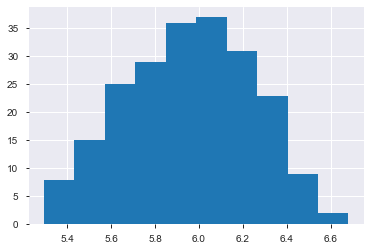

In [379]:
np.log10(tokamak_data[tokamak_data.tok == "D3D"].prad).hist()

In [351]:

tokamak_data.loc[
  ( tokamak_data["wfaniic"].isnull() & ( tokamak_data.tok == "AUG" ) ),
  "imp_wfaniic"
] = True

tokamak_data.loc[
  ( tokamak_data["wfaniic"].isnull() & ( tokamak_data.tok == "AUG" ) ),
  "wfaniic"
] = 0


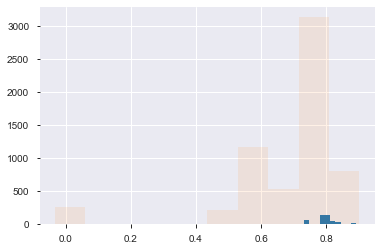

In [360]:
tokamak_data[tokamak_data.tok == "D3D"].wfani.hist()
tokamak_data.wfani.hist(alpha=0.1)

In [308]:
# tokamak_data.to_pickle("./tev_data.pkl")

In [39]:
# tokamak_data.to_pickle("./work_data.pkl")

In [ ]:
foo_width = 7

def foo(index):
    offset = index * foo_width
    return tokamak_data[tokamak_data.columns[offset:offset+foo_width]].sample(20)

interact(foo, index=(0,floor(len(tokamak_data.columns)/foo_width)))


In [ ]:
def g(x, log):
    dd = tokamak_data[x].copy()
    ii = dd.copy()
    if log: 
        dd = np.log10(dd) 

    dd.hist(alpha=0.5)
    plt.ylim(0,len(tokamak_data))
    
    if not log: 
        dd[dd.isnull()] = 0
        dd[dd==0].hist(alpha=0.5)
        
    plt.title(x)
    plt.ylim(0,len(tokamak_data))
    
    print(1-len(ii[ii.isnull()])/len(ii))
    return ii.value_counts(dropna=False)

interact(g, log=False, x=widgets.Select(
    options=sorted([cc for cc in partial_columns]),
    rows=8
#     description='Speed:',
#     disabled=False,
#     button_style='', # 'success', 'info', 'warning', 'danger' or ''
#     tooltips=['Description of slow', 'Description of regular', 'Description of fast'],
#     icons=['check'] * 3
))
;

In [238]:
abridged_dict = {}
cur_threshold = 0.5

for cur_key, cur_value in answers.items():
    cur_col, cur_tok, use_log, use_all = cur_key
    cur_score, cur_columns = cur_value
    if cur_score < cur_threshold : continue
        
    if cur_col not in abridged_dict: abridged_dict[cur_col] = {}

    if cur_tok not in abridged_dict[cur_col]:
        abridged_dict[cur_col][cur_tok] = (cur_score, use_log, use_all, cur_columns)
        continue
        
    if cur_score < abridged_dict[cur_col][cur_tok][0] : continue
    abridged_dict[cur_col][cur_tok] = (cur_score, use_log, use_all, cur_columns)

abridged_dict

{'prad': {'D3D': (0.7438067287052118,
   False,
   False,
   ['delta',
    'elmtype_none',
    'inv_kappaa',
    'inv_pgasa',
    'inv_q95',
    'log_inv_pgasa',
    'meff',
    'pgasa',
    'pl',
    'tautot',
    'time',
    'wth',
    '_inv_abs_ip_inv_nel_2',
    '_epsilon_2_vol',
    '_abs_bt_2_inv_nel',
    '_inv_abs_ip_2_nel',
    '_inv_abs_bt_nel_2',
    '_abs_bt_abs_ip_nel']),
  'CMOD': (0.584048498326778,
   False,
   False,
   ['abs_pohm',
    'delta',
    'elmtype_none',
    'imp_tev',
    'inv_pl',
    'inv_tauth',
    'phase_selm',
    'picrhc',
    'pohm',
    '_inv_epsilon_2_vol',
    '_epsilon_2_inv_abs_bt',
    '_epsilon_inv_rgeo_2',
    '_inv_abs_ip_nel_vol'])},
 'tev': {'ASDEX': (0.7154766223684763,
   True,
   False,
   ['abs_pohm',
    'divmat_c',
    'inv_wmhd',
    'log_inv_wth',
    'pohm',
    'standard',
    'walmat_c',
    '_rgeo_3'])}}

In [ ]:
jet_dict = {}

for cur_col in partial_columns:
    null_count = len(tokamak_data[tokamak_data[cur_col].isnull()])
    super_good_perc = 1-null_count/len(tokamak_data)
    
    if super_good_perc == 1: continue
        
    print("--------")
    print(cur_col)
    print([null_count, super_good_perc, "ALL"])
    
    for tok in tok_names:
        sub_data = tokamak_data[tokamak_data.TOK == tok]
        
        null_count = len(sub_data[sub_data[cur_col].isnull()])
        good_perc = 1-null_count/len(sub_data)

        if null_count == 0: continue
        assert good_perc > 0
        
        if good_perc < 0.15 or super_good_perc > 0.98:
            print([111,null_count, round(super_good_perc,3), tok])
            
            tokamak_data.loc[
                ( tokamak_data[cur_col].isnull() & ( tokamak_data.TOK == tok ) ),
                "imputed_count"
            ] = np.array(tokamak_data.loc[
                ( tokamak_data[cur_col].isnull() & ( tokamak_data.TOK == tok ) )
            ]["imputed_count"]) + 1
            
            tokamak_data.loc[
                ( tokamak_data[cur_col].isnull() & ( tokamak_data.TOK == tok ) ),
                cur_col
            ] = sub_data[cur_col].dropna().median()
            
            continue
            
        assert tok == "JET"
        jet_dict[cur_col] = good_perc


In [ ]:
expanded_data = tokamak_data.copy()

In [ ]:
expanded_data

In [ ]:
expanded_data.replace([np.inf, -np.inf], np.nan, inplace=True)


In [ ]:
expanded_data.info(verbose=True,null_counts=True)


In [ ]:
expanded_data.columns.to_list()

In [ ]:
full_columns = list(tokamak_data.dropna(axis=1).columns)

partial_columns = [
    work_col for work_col in tokamak_data.columns if work_col not in full_columns
]

[len(full_columns), len(partial_columns)]


In [ ]:
for cur_key, cur_value in reversed(sorted(jet_dict.items(), key=lambda x: x[1])):
    jet_data = tokamak_data[~tokamak_data[cur_key].isnull() & (tokamak_data.TOK == "JET")]
    jet_X = jet_data[[work_col for work_col in full_columns if work_col != "TOK"]]
    jet_y = jet_data[cur_key]
    
    skipped_columns = ["TOK", "imputed_count"]
    
    attempt_count = 0
    
    while True:
        tmp_jet_X = jet_X[[ 
            work_col for work_col in full_columns if work_col not in skipped_columns 
        ]]
        
        X_train, X_test, y_train, y_test = train_test_split(tmp_jet_X, jet_y, test_size=0.2)
        scaler = StandardScaler().fit(X_train)
        
        X_train = pd.DataFrame(scaler.transform(X_train), columns=tmp_jet_X.columns)
        X_test = pd.DataFrame(scaler.transform(X_test), columns=tmp_jet_X.columns)
        
        cur_cv = LassoCV(cv=3, n_alphas=256, max_iter=100000, tol=1e-6, n_jobs=-1)
        cur_cv.fit(X_train, y_train)
        
        new_skipped = list(X_train.columns[np.abs(cur_cv.coef_) < 1e-6])
        if len(new_skipped) == 0: 
            attempt_count += 1
            if attempt_count > 5 : break

        skipped_columns.extend(new_skipped)
        
    print(cur_key)
    print(cur_cv.score(X_train, y_train))
    print(cur_cv.score(X_test, y_test))

    used_cols = [ 
        work_col for work_col in full_columns if work_col not in skipped_columns 
    ]
    
    tmp_jet_X = jet_X[used_cols]

    X_train, X_test, y_train, y_test = train_test_split(tmp_jet_X, jet_y, test_size=0.2)
    scaler = StandardScaler().fit(X_train)

    X_train = pd.DataFrame(scaler.transform(X_train), columns=used_cols)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=used_cols)

    cur_cv = RidgeCV(cv=3, alphas=np.logspace(-4,4,1200))
    cur_cv.fit(X_train, y_train)
    
    if cur_cv.alpha_ < 1e-4:
        print("????")
        cur_cv = LassoCV(cv=3, n_alphas=256, max_iter=100000, tol=1e-6, n_jobs=-1)
        cur_cv.fit(X_train, y_train)
    else:
        assert cur_cv.alpha_ < 1e+4
    
    train_score = cur_cv.score(X_train, y_train)
    test_score = cur_cv.score(X_test, y_test)
    
    assert np.abs(train_score - test_score) < 0.05
    assert train_score > 0.8 or test_score > 0.8
    
    print(used_cols)
    
    in_data = tokamak_data[( tokamak_data.TOK == "JET" ) & tokamak_data[cur_key].isnull() ][used_cols]
    in_data = pd.DataFrame(scaler.transform(in_data), columns=used_cols)
    
    tokamak_data.loc[
        ( tokamak_data.TOK == "JET" ) & tokamak_data[cur_key].isnull(),
        "imputed_count"
    ] = np.array(tokamak_data[
        ( tokamak_data.TOK == "JET" ) & tokamak_data[cur_key].isnull()
    ]["imputed_count"]) + 1
    
    tokamak_data.loc[
        ( tokamak_data.TOK == "JET" ) & tokamak_data[cur_key].isnull(),
        cur_key
    ] = cur_cv.predict(in_data)
    
    print(cur_key)
    print(train_score)
    print(test_score)
    
    full_columns.append(cur_key)


In [ ]:
sorted(list(tokamak_data.TOK.value_counts().index))

In [ ]:
for work_col in tokamak_data.columns:
    if work_col == "imputed_count": continue
    assert len(tokamak_data[work_col].value_counts()) > 1
    if tokamak_data[work_col].dtype != bool: continue
    tokamak_data[work_col] = tokamak_data[work_col].astype(int)
    

In [ ]:
poly_data = tokamak_data.copy()


In [ ]:
poly_data

In [ ]:
for cur_col in poly_data.columns:
    if cur_col == "TOK": continue
    if 0 in poly_data[cur_col].values: continue
    poly_data[f"INV_{cur_col}"] = 1 / poly_data[cur_col]

In [ ]:
poly_data.columns = poly_data.columns.str.lower()
poly_data.columns = poly_data.columns.str.replace("-", "_")

poly_data.replace([np.inf, -np.inf], np.nan, inplace=True)


In [ ]:
resample_dict = {}

In [ ]:
jet_count

In [ ]:
tok_dict = poly_data.tok.value_counts().to_dict()

jet_count = tok_dict["JET"]

max_count = np.max(list(tok_dict.values()))
min_count = np.min(list(tok_dict.values()))

for cur_key, cur_value in tok_dict.items():
    if cur_key == "JET": continue
    cur_value
    
tok_dict

In [601]:
desired_dict = {
    'JET': 3083,
    'ASDEX': 1500,
    'D3D': 1250,
    'AUG': 1000,
    'CMOD': 750,
    'JFT2M': 1000,
    'PBXM': 500,
    'PDX': 500,
    'TFTR': 500,
    'JT60U': 250,
    'TCV': 100,
    'TDEV': 75,
    'NSTX': 50
}


In [ ]:
for cur_key, cur_value in desired_dict.items():
    in_rows = poly_data[poly_data.tok == cur_key].copy()
    in_count = len(in_rows)

    poly_data = poly_data.append(in_rows.sample(cur_value % in_count))
    if cur_value < 2 * in_count: continue     

    for cur_times in range(floor(cur_value/in_count)-1):
        poly_data = poly_data.append(in_rows.copy())


In [ ]:
poly_data

In [ ]:
poly_X = poly_data[[cur_col for cur_col in poly_data.columns if cur_col not in ["tok", "is_good"]]]
poly_y = poly_data["is_good"]


In [ ]:
poly_data

In [ ]:
poly_data.tok.value_counts()

In [ ]:
poly_xform = PolynomialFeatures(2)
poly_XX = pd.DataFrame(
    poly_xform.fit_transform(poly_X), columns=poly_xform.get_feature_names(poly_X.columns)
)

poly_XX.columns = poly_XX.columns.str.replace("^", "_")
poly_XX.columns = poly_XX.columns.str.replace(" ", "_")

In [ ]:
list(poly_XX)

In [429]:
list(list(map(lambda yy: tokamak_data.columns[yy], np.where(list(map(lambda xx: xx.startswith("zero__imp"), tokamak_data.columns)))))[0])


[]

In [430]:
tokamak_data.drop(columns=
    list(list(map(lambda yy: tokamak_data.columns[yy], np.where(list(map(lambda xx: xx.startswith("zero__imp"), tokamak_data.columns)))))[0])

, inplace=True)

In [ ]:
poly_XX.drop(columns=["1"], inplace=True)

drop_columns = []

for cur_col in poly_XX.columns:
    if not all(np.isclose(1,np.unique(poly_XX[cur_col].values))): continue
    drop_columns.append(cur_col)
    
poly_XX.drop(columns=drop_columns, inplace=True)

drop_columns = []


In [ ]:
poly_XX

In [ ]:
sub_poly_data.rgeo

In [ ]:
im

In [ ]:
import statsmodels.api as sm

In [ ]:
plt.figure(figsize=(10,10))

cur_colors = list(map(str.strip, """
    #e6194B, #3cb44b, #ffe119, #4363d8, #f58231, 
    #42d4f4, #f032e6, #fabebe, #469990, 
    #9A6324, #800000, #000075, #a9a9a9
""".split(',')))

plot_dict_good = {}
plot_dict_bad = {}

jitter = 0.0085

for tok_index, tok_name in enumerate(tok_names):
    sub_poly_data = poly_data[poly_data.is_good & ( poly_data.tok == tok_name)]
    plot_dict_good[len(sub_poly_data), tok_name] = [np.random.normal(0, jitter, len(sub_poly_data.rgeo)) + sub_poly_data.rgeo, sub_poly_data.abs_bt]
    
    sub_poly_data = poly_data[~poly_data.is_good & ( poly_data.tok == tok_name)]
    plot_dict_bad[len(sub_poly_data), tok_name] = [np.random.normal(0, jitter, len(sub_poly_data.rgeo)) + sub_poly_data.rgeo, sub_poly_data.abs_bt]
    
labels = []
for cur_index, cur_key in enumerate(reversed(sorted(plot_dict_good.keys()))):
    labels.append(cur_key[1])    
    plt.scatter(*plot_dict_good[cur_key], alpha=0.05, color=cur_colors[cur_index])

for cur_index, cur_key in enumerate(reversed(sorted(plot_dict_bad.keys()))):   
    plt.scatter(*plot_dict_bad[cur_key], alpha=0.05, color=cur_colors[cur_index], marker='x')

    
plt.xlim(0, 1.25 * np.max(poly_data.rgeo))
plt.ylim(0, 1.25 * np.max(poly_data.abs_bt))
plt.xlabel("R [m]")
plt.ylabel("B [T]")

leg = plt.legend(labels)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
    

In [ ]:
ax

In [ ]:
good_dict = defaultdict(int)
bad_dict = defaultdict(int)

In [ ]:
for i in tqdm(range(400)):
    
    tmp_poly_X = poly_XX[[ 
        work_col for work_col in np.random.choice(poly_XX.columns, size=150, replace=False) if work_col != "imputed_count" 
    ]]
    
    scaler = StandardScaler().fit(tmp_poly_X)

    tmp_poly_X = pd.DataFrame(scaler.transform(tmp_poly_X), columns=tmp_poly_X.columns)

    cur_cv = LassoCV(n_jobs=-1, cv=4, n_alphas=125, max_iter=75000, tol=1e-4)
    cur_cv.fit(tmp_poly_X, poly_y)

    for cur_index, cur_col in enumerate(tmp_poly_X.columns):
        if np.abs(cur_cv.coef_[cur_index]) < 1e-6:
            bad_dict[cur_col] += 1
        else:
            good_dict[cur_col] += 1
            

In [ ]:
np.max(list(good_dict.values()))

In [ ]:
np.max(list(bad_dict.values()))

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
from sklearn.feature_selection import RFECV

In [ ]:
cv = StratifiedKFold(5)
visualizer = RFECV(RandomForestClassifier(n_estimators=125, max_depth=6), cv=cv, scoring='f1_weighted')

tmp_poly_X = poly_XX.copy()
scaler = StandardScaler().fit(tmp_poly_X)
tmp_poly_X = pd.DataFrame(scaler.transform(tmp_poly_X), columns=tmp_poly_X.columns)

visualizer.fit(tmp_poly_X, poly_y)
visualizer.show()


In [ ]:
[ kk for kk in good_dict.keys() if kk not in bad_dict ]

In [ ]:
for cur_key, cur_value in good_dict.items():
    if cur_value < 25: continue
    print(cur_key)

In [ ]:
clf = RandomForestClassifier(n_estimators=25000, max_depth=5)

In [ ]:
tmp_poly_X = poly_XX.copy()
scaler = StandardScaler().fit(tmp_poly_X)
tmp_poly_X = pd.DataFrame(scaler.transform(tmp_poly_X), columns=tmp_poly_X.columns)


In [ ]:
clf.fit(tmp_poly_X, poly_y)

In [ ]:
yy, xx = list(zip(*reversed(sorted(zip(clf.feature_importances_,tmp_poly_X.columns )))))
nn = 35
xx = xx[0:nn]
yy = yy[0:nn]
plt.barh(xx,yy)


In [ ]:
for cur_col in poly_XX.columns:
    if any(poly_XX[cur_col].isnull()):
        print(cur_col)

In [ ]:
poly_XX.isnull()